## Decision tree and Random Forest and XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('iris')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
X = df.drop(columns=['species'])

In [4]:
## Label_Encoder or Dummies

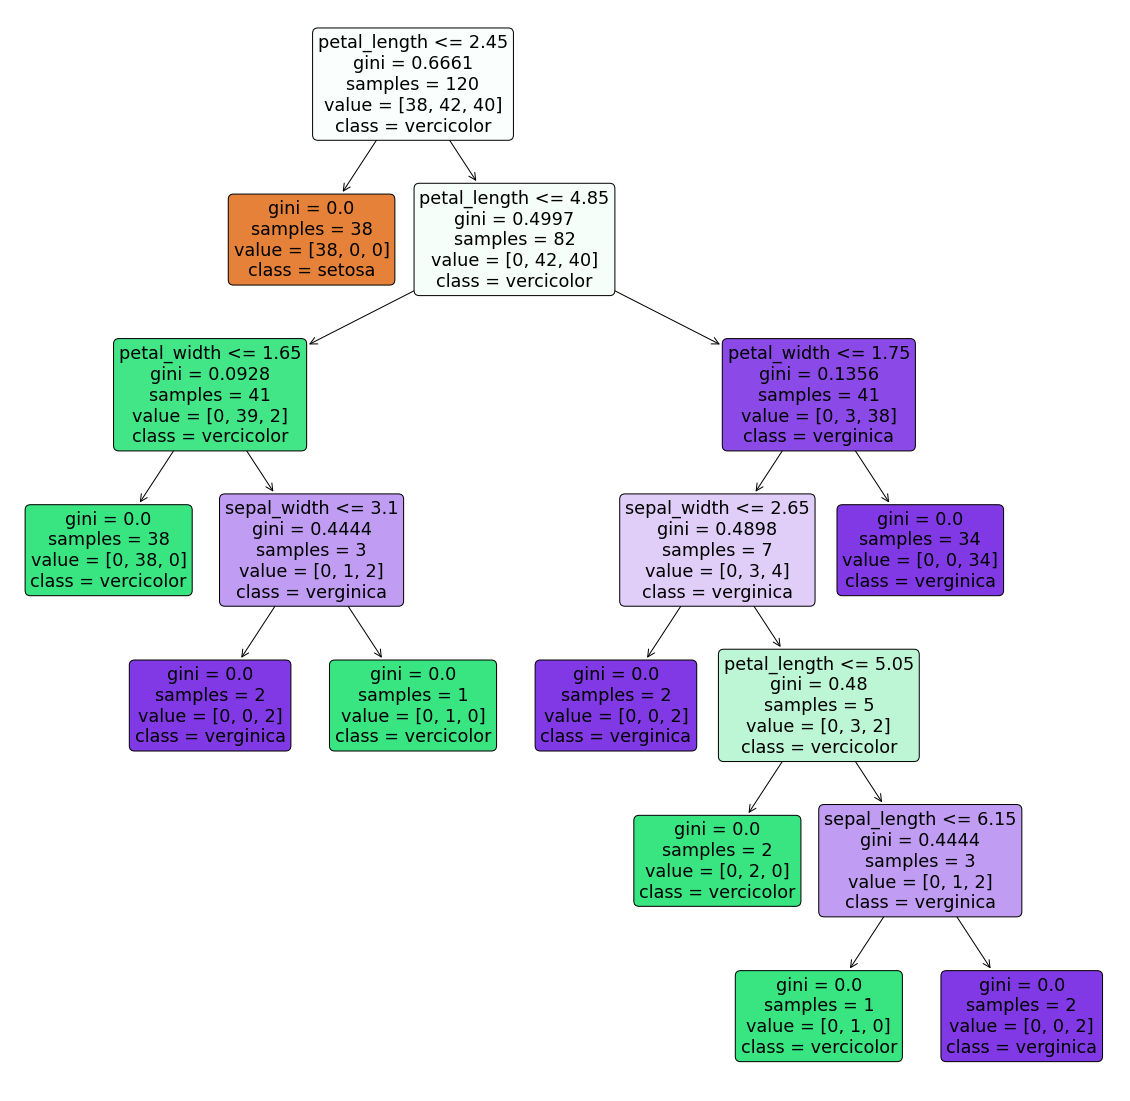

In [7]:
le = LabelEncoder()
target = le.fit_transform(df["species"])
y = target

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

In [8]:
dtree.score(X_test, y_test)

0.9666666666666667

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

## XGBoost and other boost

In [11]:
## Gradient boosting for decision trees

In [12]:
pip install xgboost

     |████████████████████████████████| 1.6 MB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
conda install xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda


Solving environment: done

## Package Plan ##

  environment location: /Users/huangz36/miniconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          13 KB
    boltons-23.0.0             |   py39hca03da5_0         429 KB
    ca-certificates-2023.05.30 |       hca03da5_0         121 KB
    certifi-2023.5.7           |   py39hca03da5_0         153 KB
    conda-23.3.1               |   py39hca03da5_0         963 KB
    joblib-1.2.0               |   py39hca03da5_0         391 KB
    jsonpatch-1.32             |

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [16]:
# Load the iris dataset
iris = load_iris()

# Store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Create an XGBoost classifier
xgb = XGBClassifier()

# Train the model on the training set
xgb.fit(X_train, y_train)

/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:16] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [17]:
xgb.score(X_test, y_test)

0.9666666666666667

### AdaBoost

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Load the iris dataset
iris = load_iris()

# Store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Create an AdaBoost classifier
ada = AdaBoostClassifier()

# Train the model on the training set
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [19]:
ada.score(X_test, y_test)

0.9666666666666667

In [20]:
## Install python, need to check (for windows), add python to the path, checkbox on the prompt